# Part 1

The accompanying dataset contains transactions made by credit cards in two days. It contains only numeric input variables which are the result of a Principal Component Analysis (PCA) transformation, due to confidentiality issues. The only features that are not transformed are 'Time' and 'Dollar_amount'.


	1. Features P1, P2, ... P28 are the principal components obtained with PCA
	2. ‘Time' is the seconds elapsed between each transaction and the first transaction
		in the dataset.
	3. 'Dollar_amount' is the transaction amount
	4. 'Outcome' is the response variable, 1 in case of fraud and 0 otherwise.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Data Reading and Understanding

In [8]:
data=pd.read_csv("dataset_TakeHome_Finder.csv")

In [9]:
data.head()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Dollar_amount,Outcome
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.tail()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Dollar_amount,Outcome
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
data.shape

(284807, 31)

In [12]:
data.isnull().sum()

Time              0
P1                0
P2                0
P3                0
P4                0
P5                0
P6                0
P7                0
P8                0
P9                0
P10               0
P11               0
P12               0
P13               0
P14               0
P15               0
P16               0
P17               0
P18               0
P19               0
P20               0
P21               0
P22               0
P23               0
P24               0
P25               0
P26               0
P27               0
P28               0
Dollar_amount    12
Outcome           0
dtype: int64

#### We can see that column Dollar_amount has 12 missing values.

In [13]:
data.nunique()

Time             124592
P1               275653
P2               275655
P3               275657
P4               275654
P5               275657
P6               275652
P7               275651
P8               275643
P9               275656
P10              275646
P11              275648
P12              275654
P13              275657
P14              275653
P15              275653
P16              275645
P17              275646
P18              275655
P19              275645
P20              275632
P21              275617
P22              275644
P23              275611
P24              275645
P25              275640
P26              275647
P27              275597
P28              275558
Dollar_amount     32767
Outcome               2
dtype: int64

## 2. Univariate Analysis 

Dollar Amount outlier analysis

#### Outlier Analysis

In [14]:
data['Dollar_amount'].max()

25691.16

The max amount is $25691.16 which raises the question of being an outlier

In [15]:
data['Dollar_amount'].min()

0.0

<AxesSubplot:xlabel='Dollar_amount'>

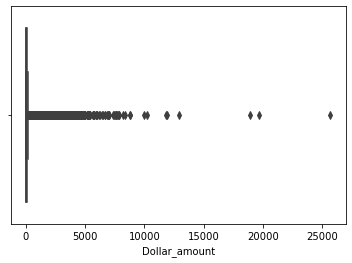

In [16]:
#Outlier analysis
sns.boxplot(data=data, x='Dollar_amount')

Plotting the histogram plot for time to understand the distribution of transactions

<AxesSubplot:xlabel='Time', ylabel='Count'>

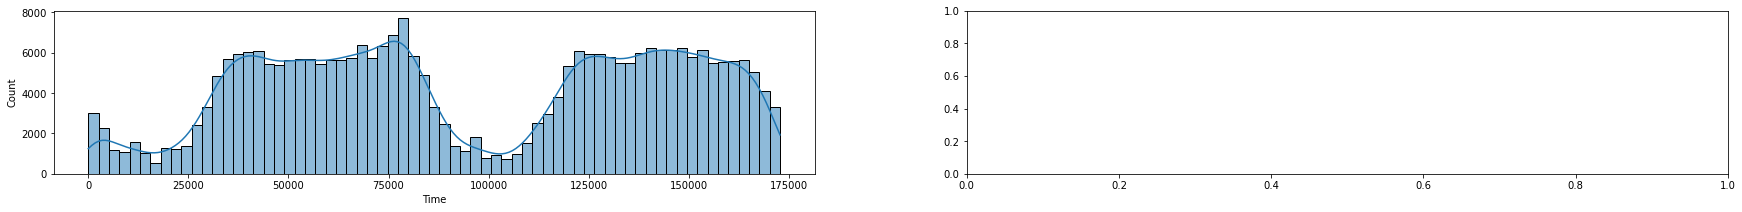

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(30,3))
sns.histplot(data=data, x='Time', kde=True, ax=ax[0])

#### Here we can see that since the value counts for class 1 is very less, hence the data set is highly imbalanced due to which the model accuracy will be reduced and highly skewed. 

This issue is solved in the preprocessing section

In [8]:
data.Outcome.value_counts()

0    284315
1       492
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

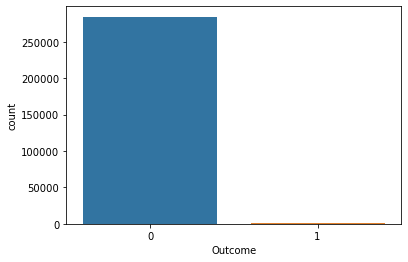

In [9]:
sns.countplot(data=data, x='Outcome')

## 3. Bivariate Analysis 

### Amount generated by fraudulent and non fraudulent transactions

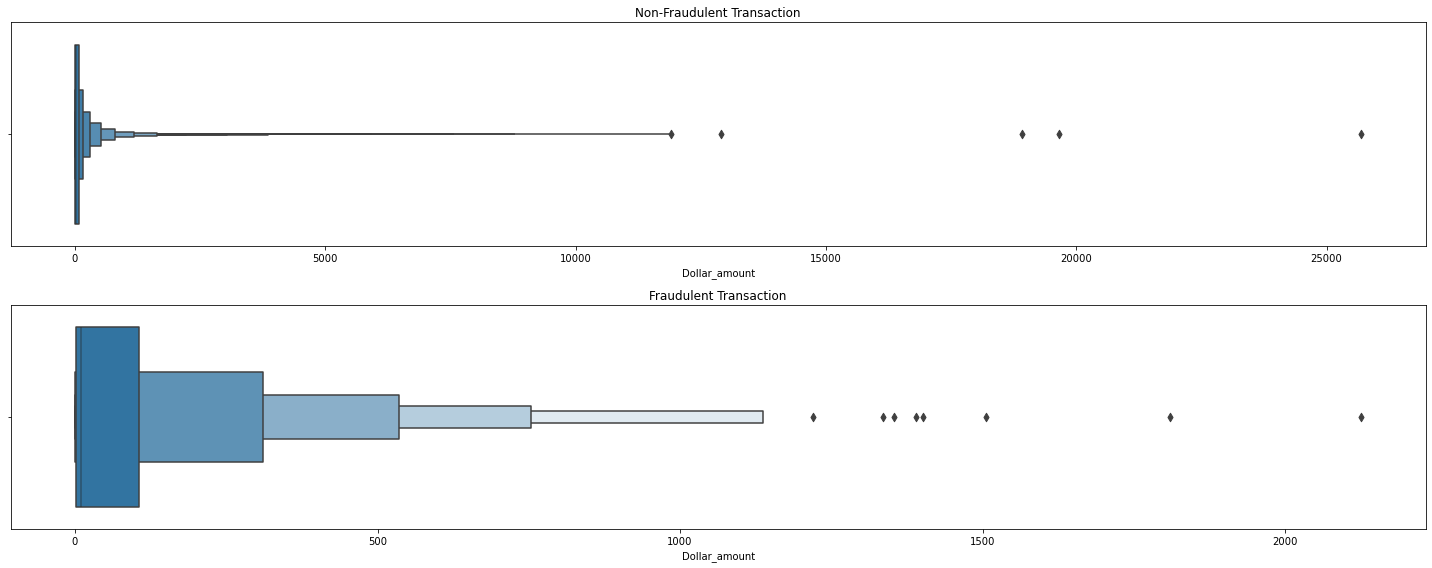

In [24]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.boxenplot(data=data[ data.Outcome == 0 ], x= 'Dollar_amount', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.boxenplot(data=data[ data.Outcome == 1 ], x= 'Dollar_amount', ax=axs[1])

plt.tight_layout()

In [25]:
data.groupby('Outcome')['Dollar_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,284303.0,88.292757,250.109960,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [26]:
corr = data.corr(method='pearson')

In [27]:
corr

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Dollar_amount,Outcome
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010611,-0.012323
P1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227713,-0.101347
P2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
P3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210883,-0.192961
P4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098733,0.133447
P5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386359,-0.094974
P6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215986,-0.043643
P7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397314,-0.187257
P8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103082,0.019875
P9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


In [37]:
#pltCorrelationMatrix(data, 8)

Transformation

## 4. Data Preprocessing and Transformation

In [38]:
#Transforming time variable
data[['Time', 'Amount']] = StandardScaler().fit_transform(data[['Time', 'Dollar_amount']])

In [39]:
data.head()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P22,P23,P24,P25,P26,P27,P28,Dollar_amount,Outcome,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244953
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160656
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140525
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073409


### Handling class imbalaned data 

In this case as we can see that non fradulent transactions (class 0) is much higher than fraudelent transactions, out modelling outcome would have skewed results due to which the model testing may not be accurate. 

For resolving this, we apply sampling techniques. Here, SMOTE (Synthetic minority oversampling technique) algorithm is used which artificially generates data for (class 1) fraudulent transactions with respect to non fraud transactions in order to remove bias in the model. 

In [40]:
data.Outcome.value_counts()

0    284315
1       492
Name: Outcome, dtype: int64

In [41]:
def sampling(x):
    df_nonfraud = data[ data.Outcome == 0 ].sample(x, random_state=0)
    df_fraud  = data[ data.Outcome == 1 ]

    df_gen = pd.concat([df_nonfraud, df_fraud]).sample(frac=1)
    X_gen = df_gen.drop('Outcome', axis = 1)
    y_gen = df_gen.Outcome
    return X_gen, y_gen

In [42]:
X_gen, y_gen = sampling( 1000 )
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_gen, y_gen)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

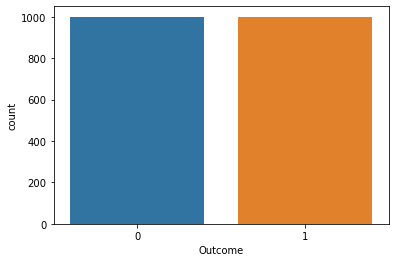

In [43]:
sns.countplot(x=y_smote)

## 5. ML Algorithm implementation

In [44]:
X_smote

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Dollar_amount,Amount
0,1.245242,1.673466,0.037588,-3.072240,0.958366,0.575200,-1.902053,0.848624,-0.450606,0.639961,...,0.032146,-0.160327,-0.186266,-0.307658,0.252884,-0.530733,-0.007901,0.044959,195.090000,0.426742
1,0.970963,2.052508,-0.125539,-1.665189,0.622321,0.100743,-1.283194,0.412054,-0.337319,0.614051,...,-0.039074,0.003534,0.076905,-0.078213,0.150375,0.391441,-0.093171,-0.076777,16.950000,-0.285463
2,-1.115646,-0.524514,1.353868,0.217128,1.241104,-0.045413,-0.880130,0.197110,0.432705,-0.448191,...,0.133762,0.252190,0.073953,0.240549,-0.303189,-0.321691,-0.144621,-0.001791,1.000000,-0.349231
3,-1.290595,1.291117,-0.566777,0.432795,-0.883631,-0.645028,0.162421,-0.764387,0.219775,-1.049549,...,0.054784,0.071535,0.145470,-0.299026,0.125583,-0.375867,0.032920,0.001412,4.950000,-0.333439
4,-0.911658,1.107046,0.088298,1.258108,1.407961,-0.793159,-0.128261,-0.403767,0.059879,0.567717,...,0.160887,0.812878,-0.051611,0.668233,0.550132,-0.221666,0.086582,0.033012,0.760000,-0.350191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.560285,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.000000,-0.349231
1996,1.088968,1.810904,-0.007054,-1.828813,0.312637,0.748257,0.114053,-0.016636,0.009049,0.712057,...,-0.138292,-0.181146,-0.115985,-0.502226,0.358314,0.058937,-0.004195,-0.013222,40.120429,-0.192828
1997,0.469259,-1.454327,-2.672116,-5.771780,3.563103,-1.286654,-1.497478,0.603536,-0.354307,-1.507897,...,1.359956,-0.078815,-1.489761,-0.173285,0.468240,-0.114784,0.232108,0.453927,1346.832441,5.031418
1998,-0.217910,-6.704001,3.886463,-9.486366,5.064592,-5.146210,-2.067353,-5.840896,3.498363,-4.598930,...,0.979618,-0.403410,0.012320,-0.279876,0.361489,0.945406,1.440269,-0.319024,253.098205,0.658659


In [137]:
y_smote

0       0
1       0
2       1
3       0
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Outcome, Length: 2000, dtype: int64

In [53]:
X_gen

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Dollar_amount,Amount
44223,-1.115288,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90,0.206092
222627,1.015942,2.296209,-1.308788,-0.912743,-1.477646,-1.309369,-0.979802,-0.993617,-0.286942,-1.236793,...,-0.167091,0.060071,0.227399,-0.099623,-0.172737,-0.153498,0.012236,-0.052513,15.00,-0.293259
77348,-0.796134,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,...,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,0.01,-0.353189
130624,-0.324710,1.260746,0.083154,0.049630,0.005971,-0.120645,-0.647342,0.202034,-0.231010,0.102808,...,-0.044643,0.122369,-0.074119,0.220568,0.516719,1.146796,-0.070886,-0.008069,5.55,-0.331041
192382,0.733956,0.753356,2.284988,-5.164492,3.831112,-0.073622,-1.316596,-1.855495,0.831079,-1.567514,...,0.382007,0.033958,0.187697,0.358433,-0.488934,-0.258802,0.296145,-0.047174,2.00,-0.345233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212421,0.927268,-0.895521,0.279457,1.063142,-1.694069,-0.481510,-1.098127,-0.042581,0.416070,0.505971,...,-0.026481,-0.360074,0.096732,0.038799,-0.669833,0.304725,-0.035157,0.039375,25.35,-0.251880
28724,-1.256881,1.159649,0.336348,0.658827,1.034814,-0.387354,-0.670478,0.063454,-0.076788,-0.324724,...,-0.153983,-0.471195,0.102192,0.502800,0.330220,-0.663243,0.023933,0.024062,9.99,-0.313289
114472,-0.448868,1.041305,-0.790056,0.792735,0.232322,-1.169655,-0.098773,-0.601418,0.123741,1.405469,...,-0.216019,-0.655392,-0.060740,-0.067335,0.123894,0.966333,-0.061943,0.025115,114.20,0.103343
152932,0.058923,-0.138161,1.857610,-0.286939,2.887128,2.767210,1.457056,1.148124,0.184897,-0.590287,...,-0.379374,-0.617304,0.099908,-2.013838,-1.363535,-0.482450,0.100212,0.057581,7.12,-0.324764


In [54]:
y_gen

44223     1
222627    0
77348     1
130624    0
192382    1
         ..
212421    0
28724     0
114472    0
152932    0
229411    0
Name: Outcome, Length: 1492, dtype: int64

### Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. 

##### Sigmoid function

sigmoid(x) = 1 / (1 + e^(-x))

### Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks.

In [46]:
algorithms = {
    'LR': LogisticRegression(random_state=0, max_iter=500),
    'RF': RandomForestClassifier(random_state=0),
    
}

In [47]:
algorithms

{'LR': LogisticRegression(max_iter=500, random_state=0),
 'RF': RandomForestClassifier(random_state=0)}

In [111]:
algorithms

{'LR': LogisticRegression(max_iter=500, random_state=0),
 'RF': RandomForestClassifier(random_state=0)}

## 6. Model Evaluation

In [50]:
# creating a function to calculation classification model metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0),
    'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr')
}

In [138]:
algorithms = {'LR': LogisticRegression(random_state=0, max_iter=500), 'RF': RandomForestClassifier(random_state=0)}

X = X_smote
y = y_smote

result = pd.DataFrame()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

for key, algorithm in algorithms.items():

    print(f'{key}...', end='')
    model = algorithm

    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_estimator=True)

    new_row = {
        'Algorithm': key,
        'accuracy': round(np.mean(cv_results['test_accuracy']), 5),
        'precision': round(np.mean(cv_results['test_precision']), 5),
        'recall': round(np.mean(cv_results['test_recall']), 5),
        'f1': round(np.mean(cv_results['test_f1']), 5),
        'roc_auc': round(np.mean(cv_results['test_roc_auc']), 5),
    }
    result = pd.concat([result, pd.Series(new_row)], axis=1)

result = result.transpose().sort_values(by='f1', ascending=False)




LR...

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

RF...

In [140]:
result

,Algorithm,accuracy,precision,recall,f1,roc_auc
0,RF,0.961,0.96204,0.961,0.96097,0.96102
0,LR,0.94633,0.9477,0.94633,0.94629,0.94638


### Here we can clearly understand that RandomForest performs much better than Logistic Regression with a high accuracy and f1 score.